In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.dates as mdate
import matplotlib.pyplot as plt 
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 

from IPython.display import display, HTML
from matplotlib.collections import LineCollection


In [2]:
data_dir ="../for_students/data_v1"
train_dir = os.path.join(data_dir, 'training')
train_str = os.path.join(train_dir, 'training_{}.csv')

In [3]:
train_df_1 = pd.read_csv(train_str.format('1'))
train_df_2  = pd.read_csv(train_str.format('2'))
train_df_3  = pd.read_csv(train_str.format('3'))

In [4]:
### Label distribution

In [5]:
for df in [train_df_1,train_df_2,train_df_3]:
    display(df['label'].value_counts())
    display(df['value'].describe())

0    4029
1       3
Name: label, dtype: int64

count    4032.000000
mean        0.421627
std         2.873468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: value, dtype: float64

0    3794
1     238
Name: label, dtype: int64

count    4032.000000
mean        0.107572
std         0.442265
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.224815
Name: value, dtype: float64

0    4032
Name: label, dtype: int64

count    4032.000000
mean       13.489853
std         3.153438
min         8.000581
25%        10.787866
50%        13.451744
75%        16.233793
max        18.996405
Name: value, dtype: float64

In [6]:
def plot_series(df, filename=None, figsize=(20,10)):  
    locator = mdate.DayLocator()
    if not os.path.exists('images'):
        os.mkdir('images')
#     x = np.arange(len(df))
#     y = df.value
#     # https://stackoverflow.com/questions/37787632/different-color-for-line-depending-on-corresponding-values-in-pyplot
#     label_colors = ['b' if label==0 else 'r'for label in df.label.values]
#     lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], y[:-1], x[1:], y[1:])]
#     colored_lines = LineCollection(lines, colors=label_colors, linewidths=(2,))
#     fig, ax = plt.subplots(figsize=figsize)
#     ax.add_collection(colored_lines)
#     ax.plot(x,y)

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    fig, ax = plt.subplots(figsize=figsize)

    ax.plot(df.timestamp,df.value)
    fig.gca().xaxis.set_major_locator(locator)
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.ylim(0, 21)
    if filename:
        fig.savefig(os.path.join('images', filename))
    plt.show()

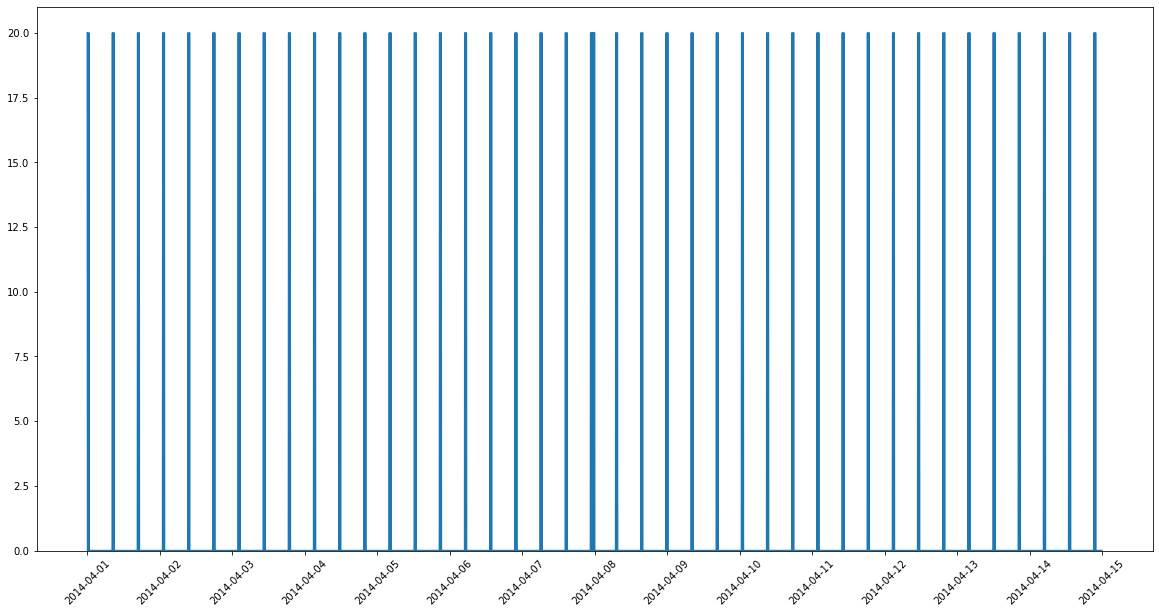

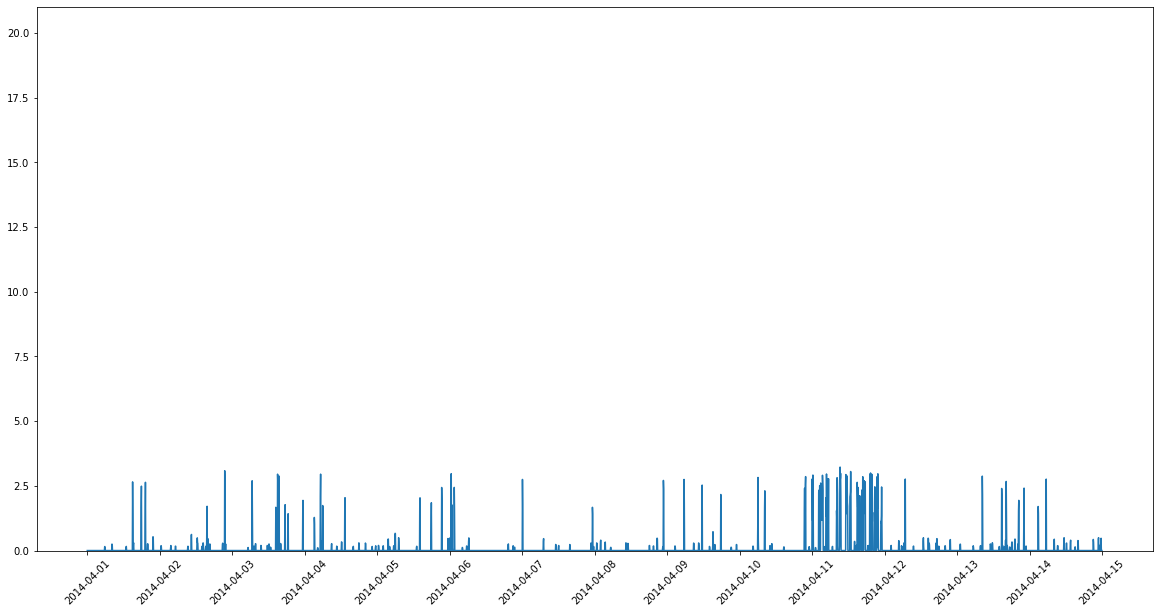

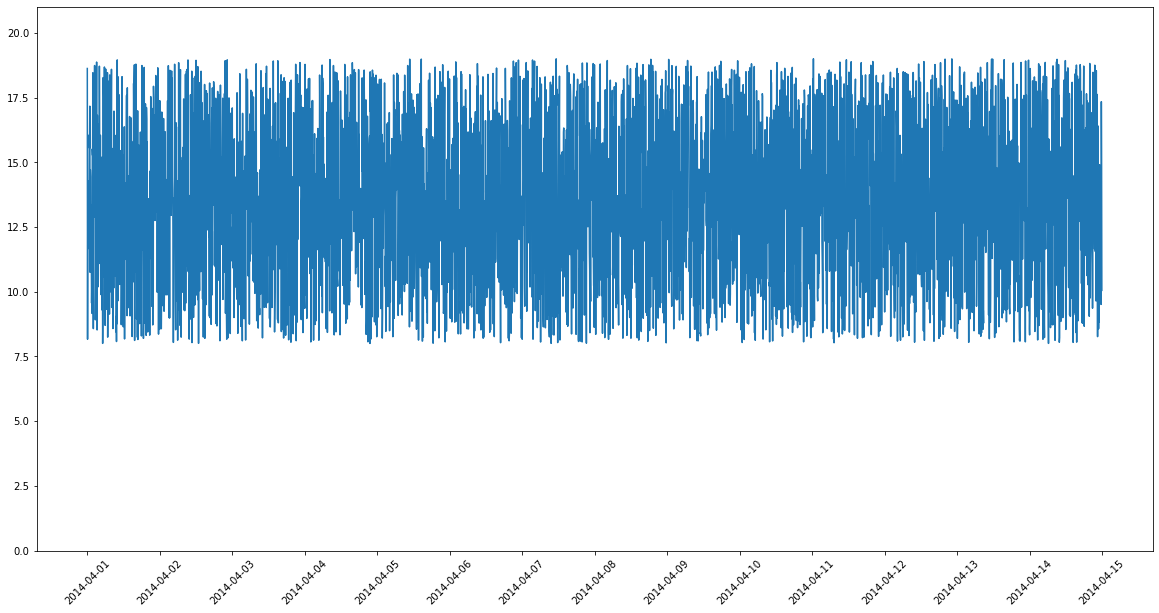

In [7]:
plot_series(train_df_1, filename="training_dataset_1")
plot_series(train_df_2, filename="training_dataset_2")
plot_series(train_df_3, filename="training_dataset_3")